In [1]:
import numpy as np
import time
np.random.seed(10)
import os
import shutil

In [2]:
import cv2
img = cv2.imread('cat/cat0.jpg', -1) # -1 for unchanged, 0 for grayscale and 1 for color
img2 = cv2.imread('cat/cat2.jpg', -1)
img = img.reshape((1, 200, 200, 3))
img2 = img2.reshape((1, 200, 200, 3))
# cv2.imwrite('cat.jpg',img)
img = np.concatenate((img, img2), axis = 0)

In [3]:
# Resize all images
# cat = np.array([], dtype=np.int64).reshape(0, 200, 200, 3)
# dog = np.array([], dtype=np.int64).reshape(0, 200, 200, 3)

# dim = (200, 200)
# i = 0
# for file in os.listdir('train'):
#     img = cv2.imread(os.path.join('train', file), -1)
#     resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#     if file.startswith('cat'):
#         cv2.imwrite(os.path.join('cat', 'cat'+str(i)+'.jpg'),resized)
#     else:
#         cv2.imwrite(os.path.join('dog', 'dog'+str(i)+'.jpg'),resized)
#     i+=1
#     if(i%100 == 0):
#         print(i)

In [4]:
# Randomly select cat and dogs in training set and obtain test set

# Example: shutil.move("cat/cat1.jpg", "test/cat1.jpg")

# i = 0
# for file in os.listdir('cat'):
#     r = np.random.rand()
#     if r < 0.20:
#         i+=1
#         shutil.move(os.path.join('cat', file), os.path.join('test', file))
# j = 0
# for file in os.listdir('dog'):
#     r = np.random.rand()
#     if r < 0.20:
#         j+=1
#         shutil.move(os.path.join('dog', file), os.path.join('test', file))
# print('i:'+str(i))
# print('j:'+str(j))

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [6]:
# Make X and y


# i = 0

# img_list = list()

# for file in os.listdir('cat'):
#     img = img_to_array(load_img('cat/' + file, target_size=(200, 200)))
#     img_list.append(img)
#     i+=1
#     if(i%100 == 0):
#         print(i)

# y = np.zeros((i, 1))

# for file in os.listdir('dog'):
#     img = img_to_array(load_img('dog/' + file, target_size=(200, 200)))
#     img_list.append(img)
#     i+=1
#     if(i%100 == 0):
#         print(i)
# X = np.asarray(img_list)
# y = np.concatenate((y, np.ones((i - y.shape[0], 1))), axis=0)

In [17]:
# randomize X and y, store in npz file

# from sklearn.utils import shuffle

# y = np.concatenate((np.ones(y.shape)-y, y), axis=1)

# X, y = shuffle(X, y)
# np.savez_compressed('train/X', arr=X)
# np.savez_compressed('train/y', arr=y)

X = np.load('train/X.npz')
X = X['arr']
y = np.load('train/y.npz')
y = y['arr']
X /= np.max(X)

[1.]


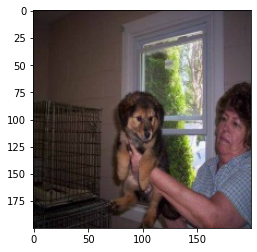

In [8]:
import matplotlib.pyplot as plt
index = 1197
print(y[index])
plt.imshow(X[index].reshape(200, 200, 3), cmap=plt.cm.binary)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD

In [13]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(200,200,3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 200, 200, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 200, 200, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 100, 100, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 100, 100, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 50, 50, 256)      

In [15]:
history = model.fit(X, y, batch_size=64, validation_split=0.1, epochs=1)

Train on 17844 samples, validate on 1983 samples
 2688/17844 [===>..........................] - ETA: 2:40:16 - loss: 7.4329 - accuracy: 0.5152

KeyboardInterrupt: 

In [ ]:
del X
del y

# Make testy
testy = np.concatenate((np.zeros((2644, 1)), np.ones((2527, 1))), axis=0)
testy.shape

# Make testX
img_list = list()
for file in os.listdir('test'):
    img = img_to_array(load_img('test/' + file, target_size=(200, 200)))
    img_list.append(img)

testX = np.asarray(img_list)
np.savez_compressed('testX', arr=testX)
del img_list
del img

testX = np.load('testX.npz')
testX = testX['arr']

In [ ]:
from sklearn.utils import shuffle

testX, testy = shuffle(testX, testy)
testy = np.concatenate((np.ones(testy.shape)-testy, testy), axis=1)

np.savez_compressed('testX', arr=testX)
np.savez_compressed('testy', arr=testy)

testX = np.load('testX.npz')
testX = testX['arr']
testy = np.load('testy.npz')
testy = testX['arr']

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(model.predict(testX), axis=1), np.argmax(testy, axis=1))